In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

pd.options.display.float_format = '{:f}'.format

In [245]:
full_df = pd.read_csv('telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


In [458]:
df = full_df.dropna()
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,9,0,0,0,0,0,1,361.000000,1000001
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,9,0,1,0,0,0,1,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,14,1,0,0,0,0,1,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,6,0,0,0,0,0,1,434.000000,1000005
5,82.275000,1312.250000,75.000000,1.237500,0.000000,0.000000,0.000000,0.000000,0.000000,156.750000,...,0.000000,14,0,0,0,0,0,1,458.000000,1000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,47.490000,0.000000,49.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,9,0,0,0,0,1,1,829.000000,1099941
99963,41.840000,351.000000,30.000000,0.990000,31.000000,10.850000,10.850000,0.000000,0.000000,0.000000,...,0.000000,5,0,0,1,0,0,1,254.000000,1099964
99970,38.340000,319.500000,30.000000,0.990000,21.000000,7.350000,7.350000,0.000000,0.000000,-66.500000,...,0.000000,5,0,0,0,0,0,1,945.000000,1099971
99976,31.923333,63.333333,16.990000,0.000000,42.666667,14.933333,14.933333,0.000000,0.000000,-38.333333,...,0.000000,5,0,0,0,0,0,1,883.000000,1099977


In [459]:
cat_columns = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_columns.append(c)
        df[c] = df[c].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,9,0,0,0,0,0,1,361.000000,1000001
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,9,0,1,0,0,0,1,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,14,1,0,0,0,0,1,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,6,0,0,0,0,0,1,434.000000,1000005
5,82.275000,1312.250000,75.000000,1.237500,0.000000,0.000000,0.000000,0.000000,0.000000,156.750000,...,0.000000,14,0,0,0,0,0,1,458.000000,1000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,47.490000,0.000000,49.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,9,0,0,0,0,1,1,829.000000,1099941
99963,41.840000,351.000000,30.000000,0.990000,31.000000,10.850000,10.850000,0.000000,0.000000,0.000000,...,0.000000,5,0,0,1,0,0,1,254.000000,1099964
99970,38.340000,319.500000,30.000000,0.990000,21.000000,7.350000,7.350000,0.000000,0.000000,-66.500000,...,0.000000,5,0,0,0,0,0,1,945.000000,1099971
99976,31.923333,63.333333,16.990000,0.000000,42.666667,14.933333,14.933333,0.000000,0.000000,-38.333333,...,0.000000,5,0,0,0,0,0,1,883.000000,1099977


<AxesSubplot:>

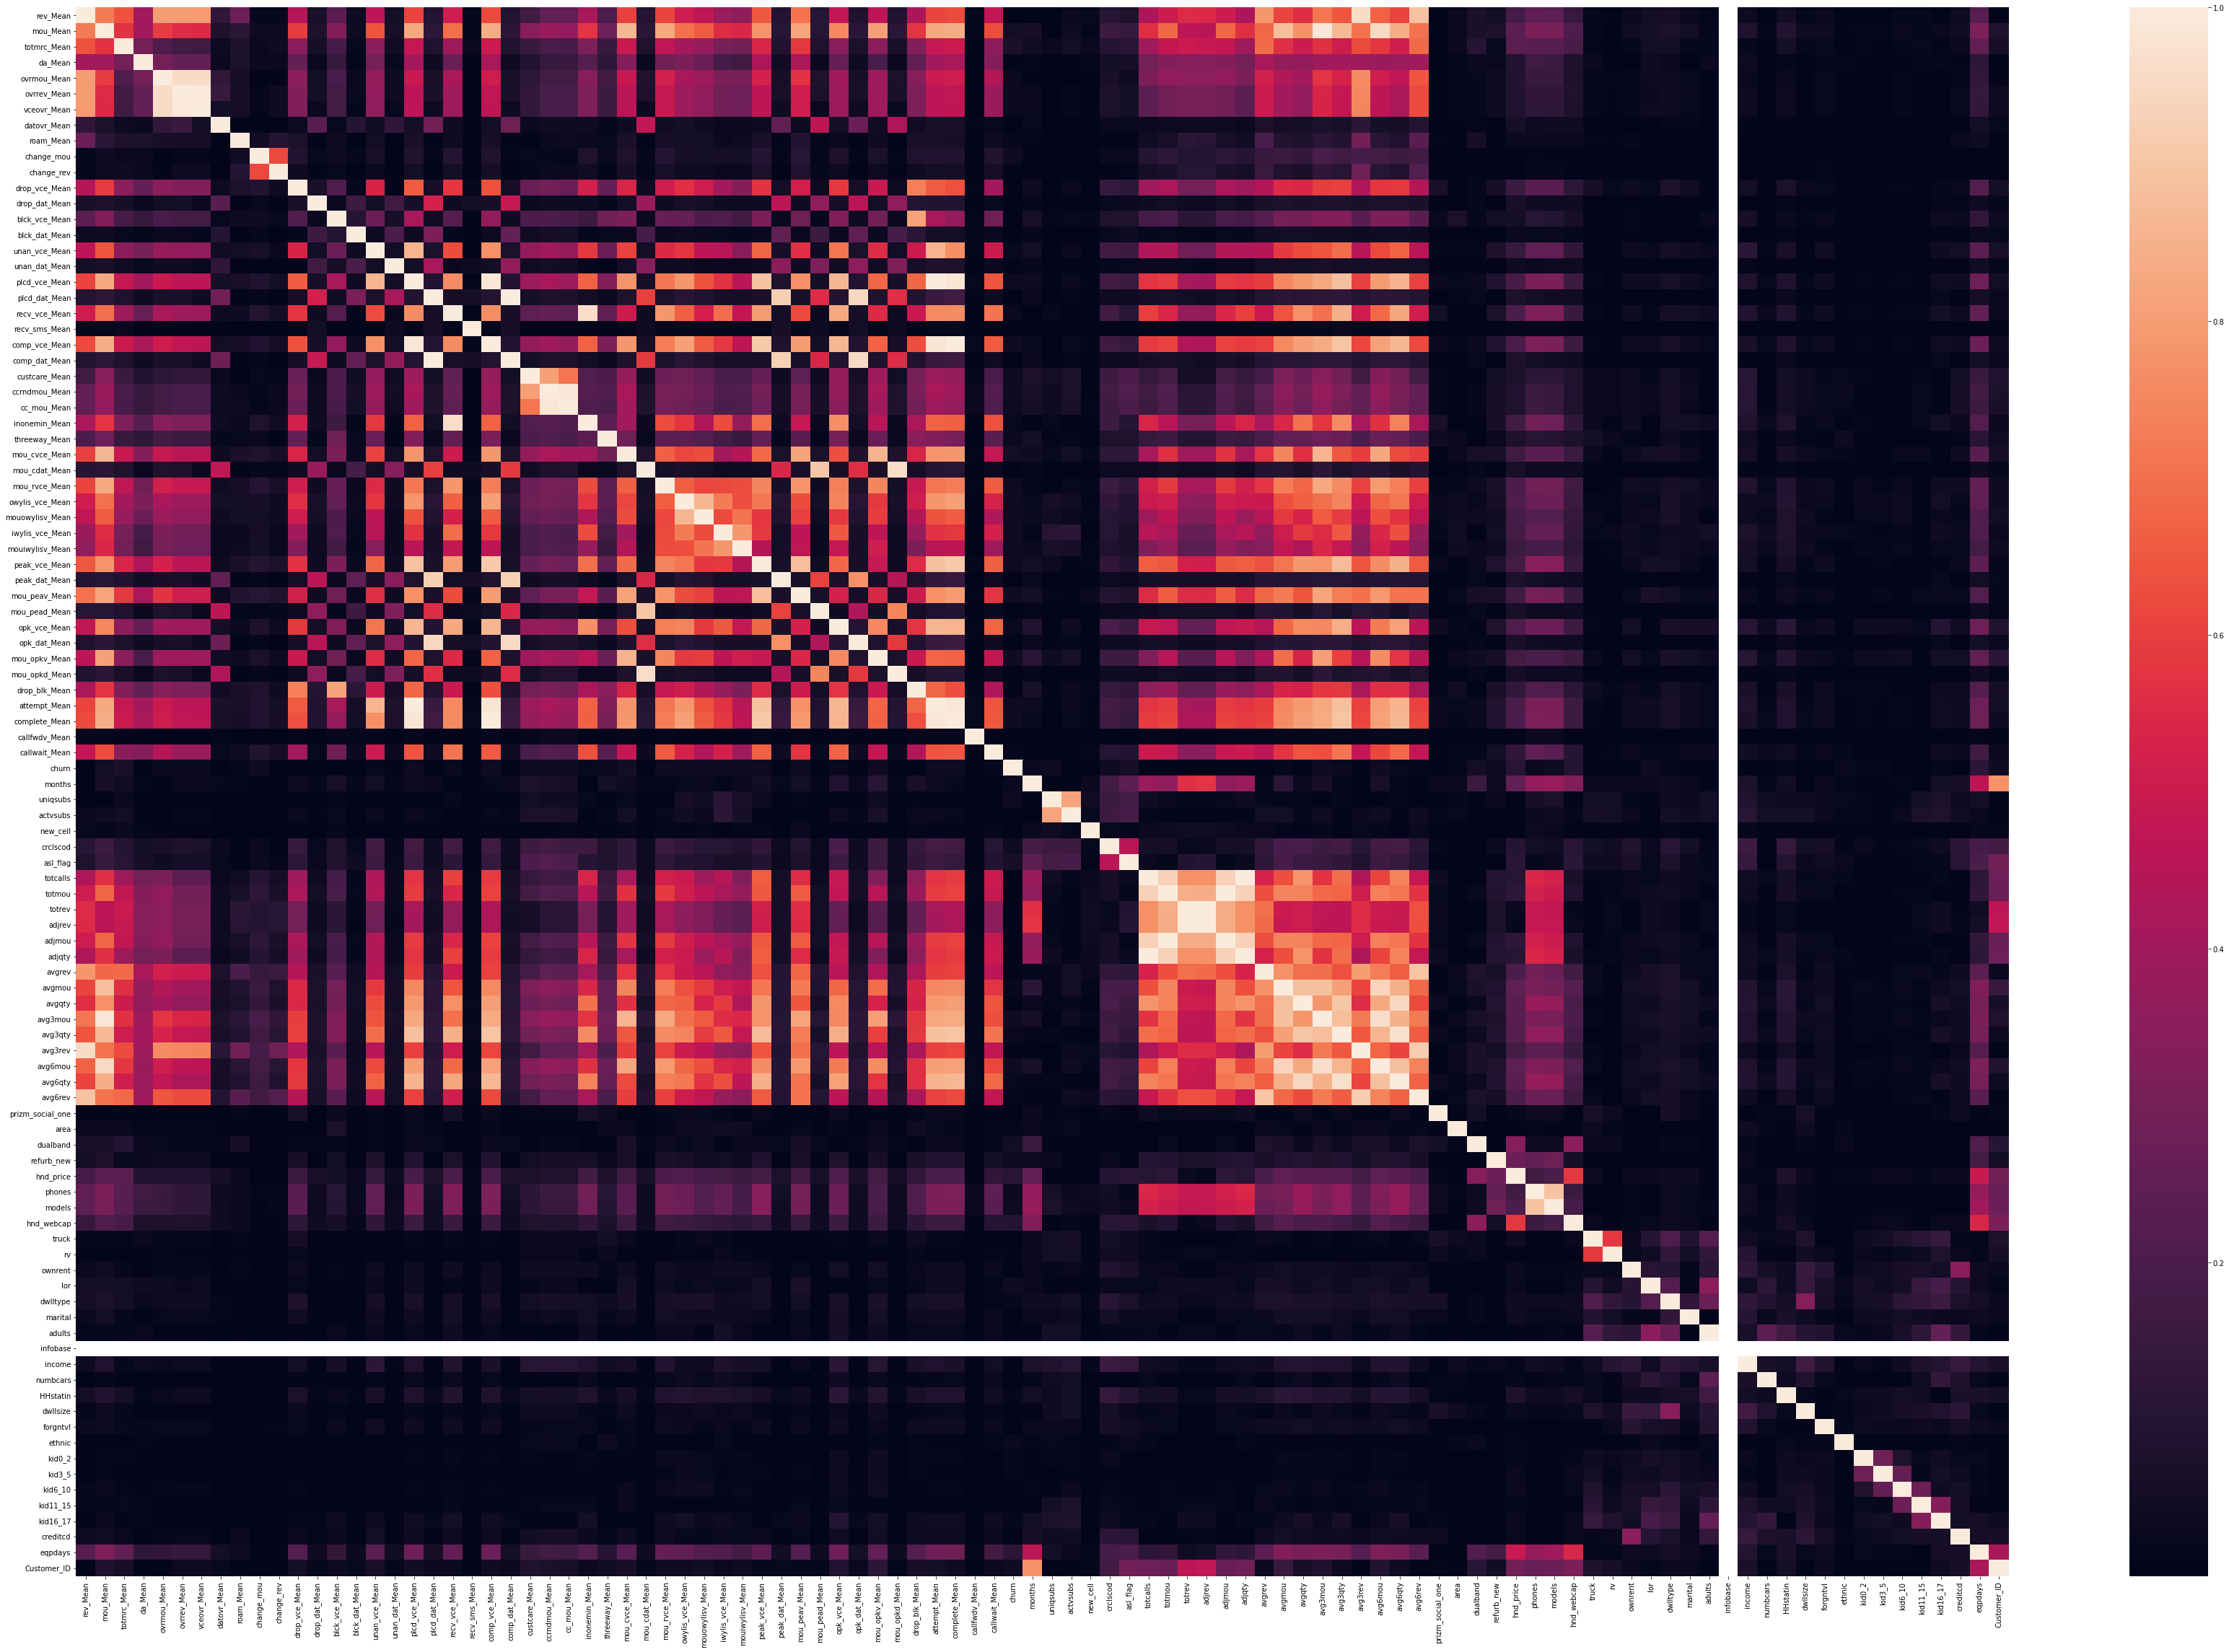

In [460]:
plt.figure(figsize = (60,40))
sns.heatmap(np.abs(df.corr()))

In [370]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

## Choose RV for analysis

In [401]:
target_features = ['rev_Mean', 'totmrc_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'totrev', 'adjrev', 'avgrev', 'avg3rev', 'avg6rev', 'change_rev']

<AxesSubplot:>

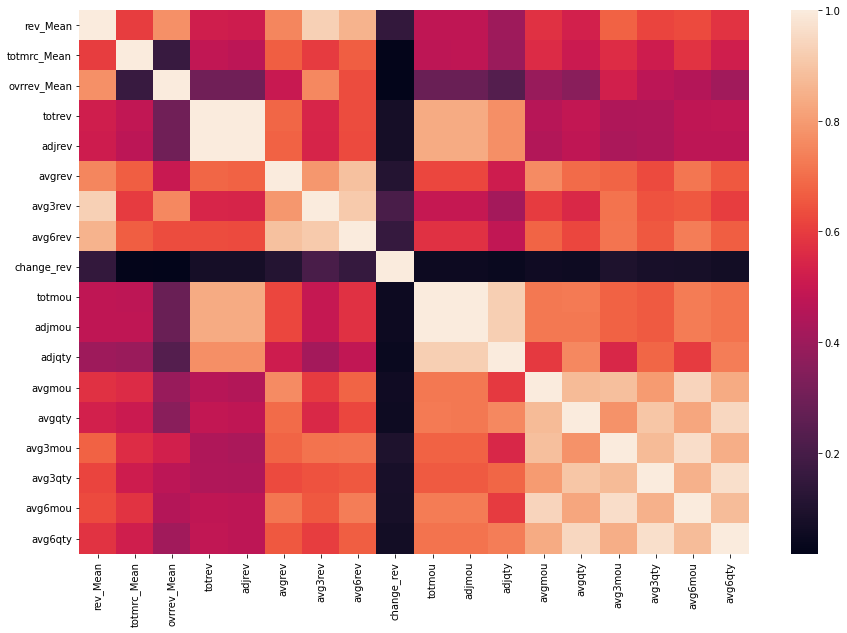

In [372]:
call_avg_features = ['totmou', 'adjmou', 'adjqty', 'avgmou','avgqty', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + call_avg_features].corr()))

<AxesSubplot:>

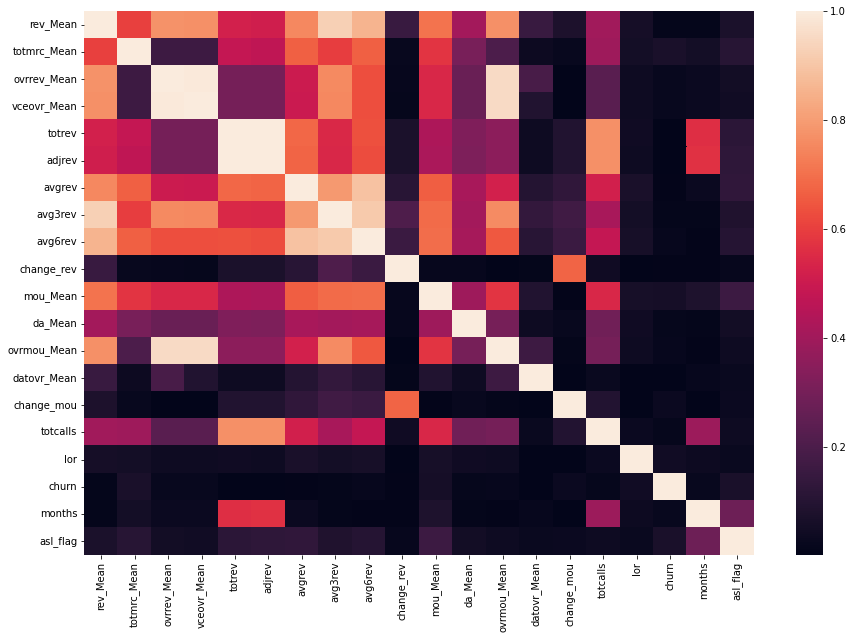

In [402]:
call_ovr_features = ['mou_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                     'change_mou', 'totcalls', 'lor', 'churn', 'months', 'asl_flag']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + call_ovr_features].corr()))

<AxesSubplot:>

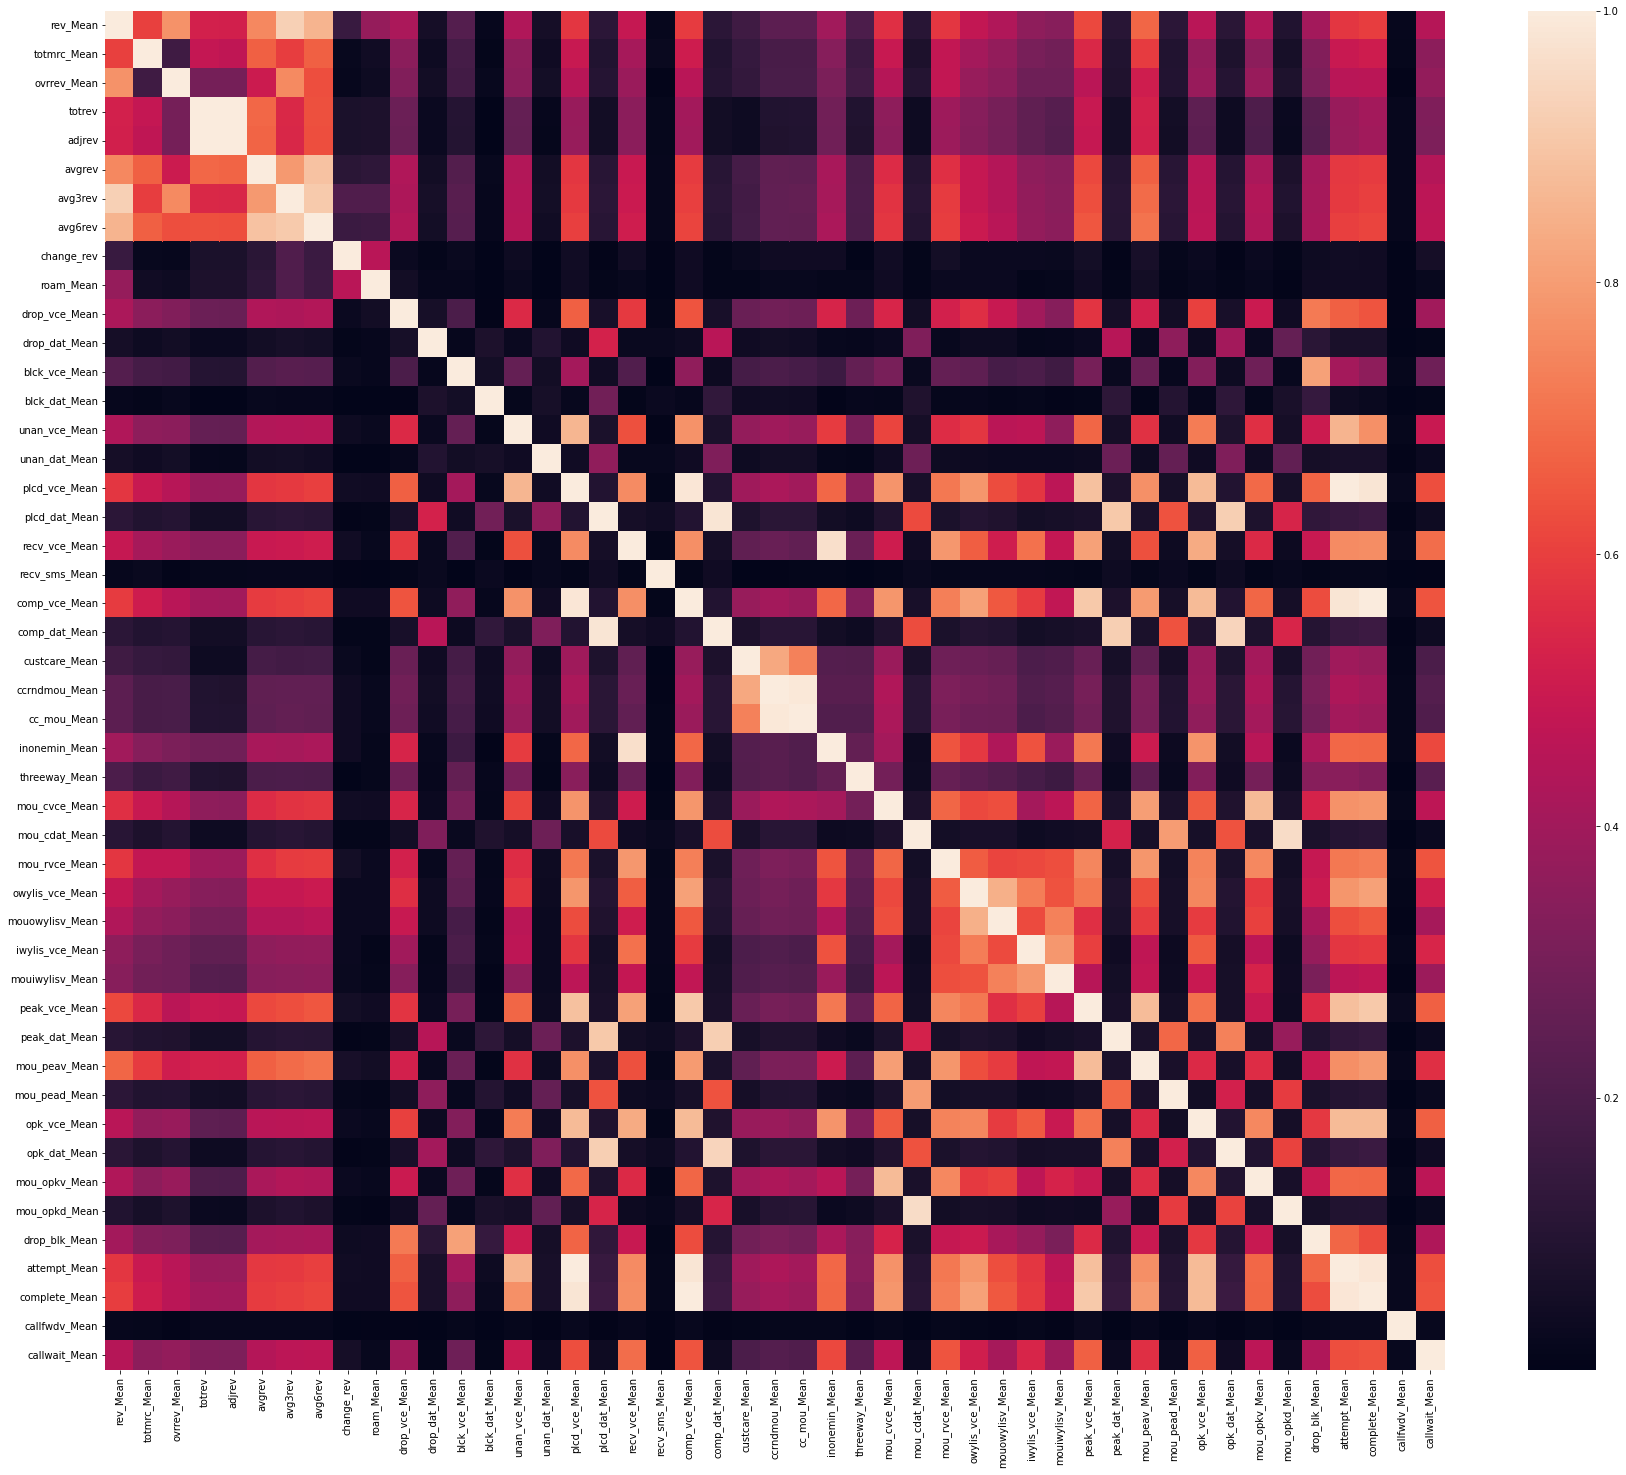

In [374]:
call_mean_features = ['roam_Mean', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean']

plt.figure(figsize = (30,25))
sns.heatmap(np.abs(df[target_features + call_mean_features].corr()))

<AxesSubplot:>

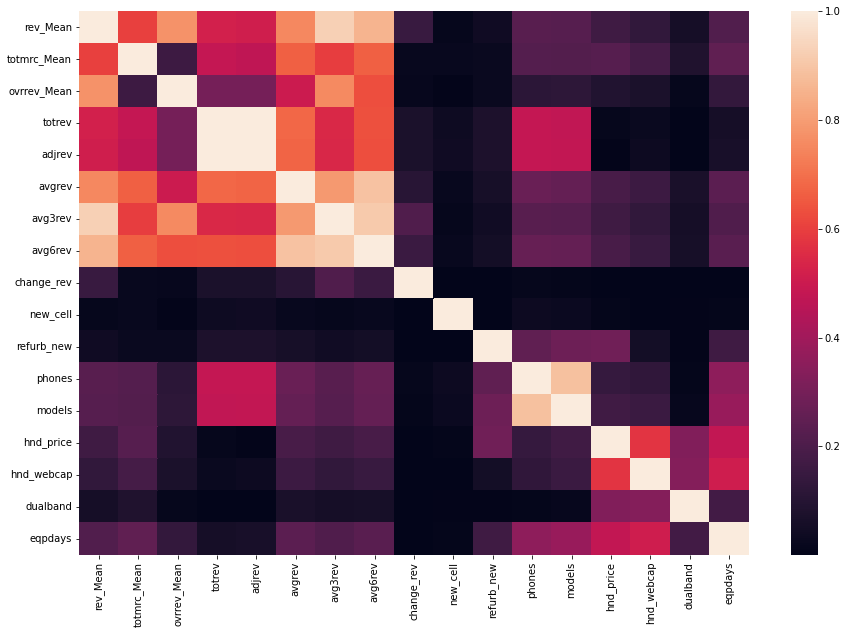

In [378]:
handset_features = ['new_cell', 'refurb_new', 'phones', 'models', 'hnd_price', 'hnd_webcap', 'dualband', 'eqpdays']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + handset_features].corr()))

<AxesSubplot:>

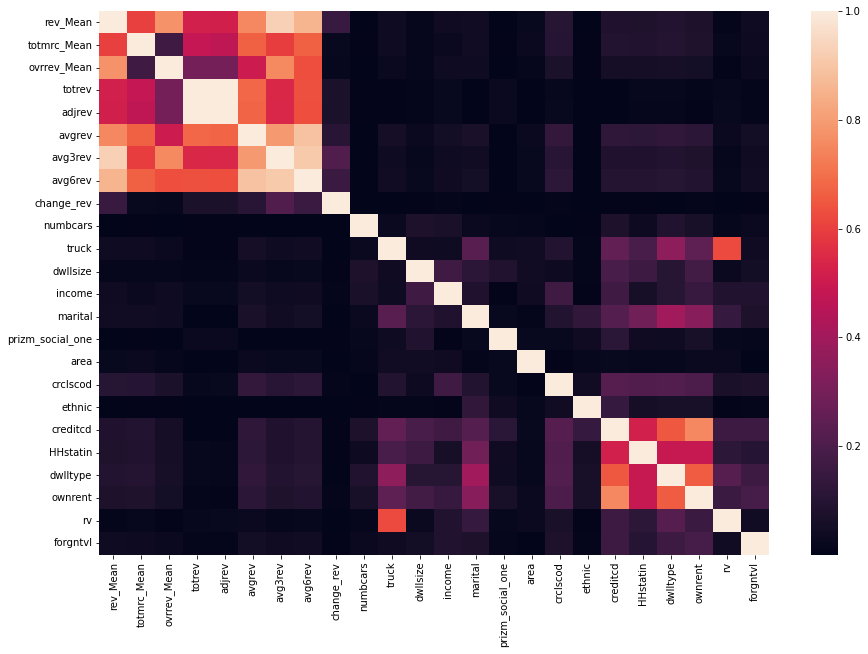

In [379]:
material_status = ['numbcars', 'truck', 'dwllsize',
                   'income', 'marital', 'prizm_social_one', 'area', 'crclscod', 'ethnic', 'creditcd', 'HHstatin',
                   'dwlltype', 'ownrent', 'rv', 'forgntvl']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + material_status].corr()))

<AxesSubplot:>

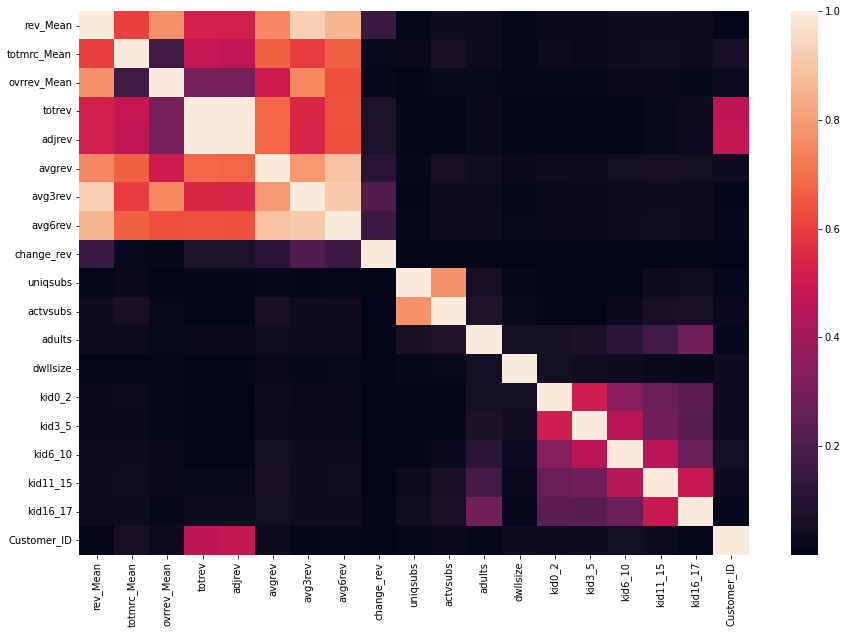

In [380]:
human_features = ['uniqsubs', 'actvsubs', 'adults', 'dwllsize', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'Customer_ID']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + human_features].corr()))

<AxesSubplot:>

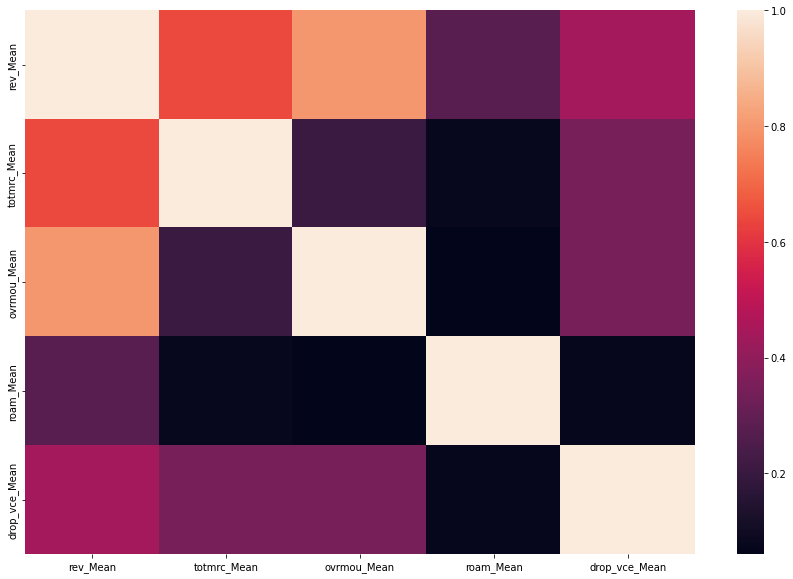

In [473]:
target_feature = 'rev_Mean'
predict_features_all = ['totmrc_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean', 'mou_cvce_Mean',
                    'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'peak_vce_Mean',
                    'mou_peav_Mean', 'attempt_Mean','complete_Mean', 
                    'phones', 'models', 'datovr_Mean', 'months',
                    'mou_Mean', 'ovrmou_Mean', 'totcalls']


predict_features = ['totmrc_Mean', 'recv_vce_Mean', 'mou_cvce_Mean', 
                    'mou_rvce_Mean', 'owylis_vce_Mean',
                    'mou_peav_Mean', 'attempt_Mean', 'mou_Mean', 'ovrmou_Mean', 'totcalls']
plt.figure(figsize = (15,10))
predict_features = ['totmrc_Mean', 'ovrmou_Mean', 'roam_Mean', 'drop_vce_Mean']
sns.heatmap(np.abs(df[[target_feature] + predict_features].corr()))

In [474]:
df_filtered = df[[target_feature] + predict_features].dropna()
df_filtered.describe()

,rev_Mean,totmrc_Mean,ovrmou_Mean,roam_Mean,drop_vce_Mean
count,46697.000000,46697.000000,46697.000000,46697.000000,46697.000000
mean,55.832471,44.634198,37.595862,1.161804,5.260759
std,42.114263,23.104645,90.950877,8.060930,8.198227
min,0.525000,-1.422500,0.000000,0.000000,0.000000
25%,31.980000,29.990000,0.000000,0.000000,0.666667
50%,44.745000,42.490000,1.500000,0.000000,2.666667
75%,66.285000,55.882500,36.250000,0.235000,6.666667
max,926.077500,349.572500,2560.250000,850.862500,232.666667


## Step 1. Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV .

rev_Mean
totmrc_Mean
recv_vce_Mean
mou_cvce_Mean
roam_Mean
peak_vce_Mean
mou_rvce_Mean
owylis_vce_Mean
mou_peav_Mean
attempt_Mean
mou_Mean
ovrmou_Mean
totcalls


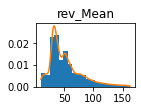

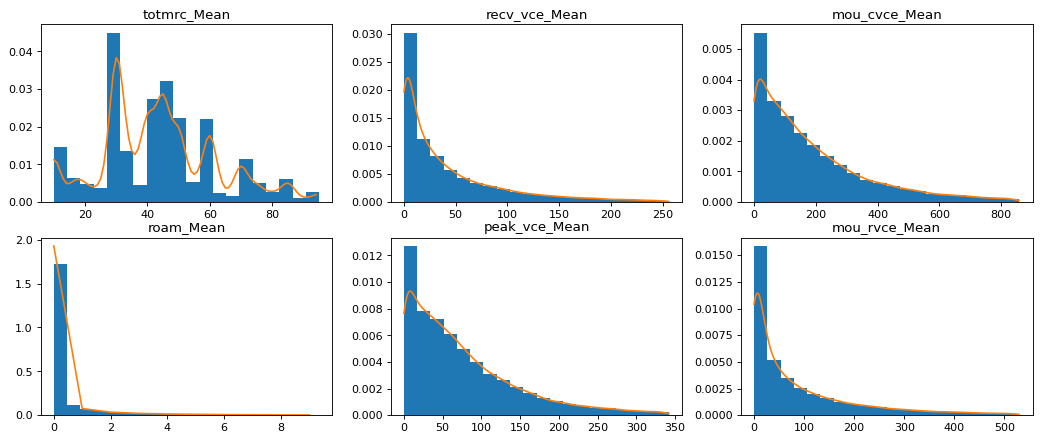

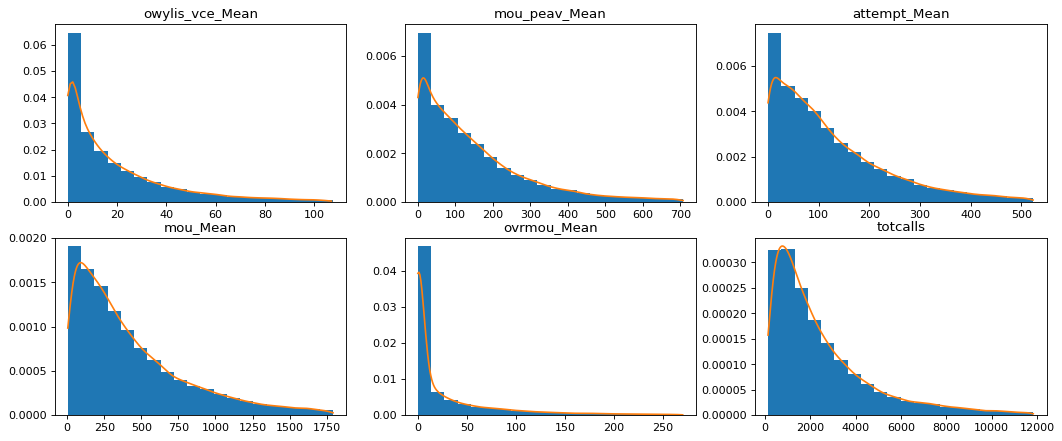

In [730]:
from scipy.stats import gaussian_kde, trimboth

def plot(feature, index, bins=20):
    print(feature)
    ax = plt.subplot(index)
    data = df[feature].dropna()
    d = data.to_numpy()
    d = trimboth(d, 0.025)
    ax.hist(d, bins=bins, density=True)

    kde = gaussian_kde(d)
    tiks = np.arange(d.min(), d.max(), 1)
    ax.plot(tiks, kde(tiks))
    ax.set_title(feature)
    
plot('rev_Mean', 331)

plt.figure(figsize=(16, 10), dpi=80)
for i, predict_feature in enumerate(predict_features[:6]):
    plot(predict_feature, 331 + i)
    
plt.figure(figsize=(16, 10), dpi=80)
for i, predict_feature in enumerate(predict_features[6:]):
    plot(predict_feature, 331 + i)

## Step 2. Estimation of multivariate mathematical expectation and variance.

In [413]:
for target_feature in target_features:
    print(f'{target_feature} mean={df[target_feature].mean()}')
    print(f'{target_feature} var={df[target_feature].var()}')

rev_Mean mean=58.7199848459021
rev_Mean var=2142.919379049111
totmrc_Mean mean=46.17913550542009
totmrc_Mean var=558.0692452259678
ovrrev_Mean mean=13.559559954035176
ovrrev_Mean var=930.3040077451333
vceovr_Mean mean=13.29506187924039
vceovr_Mean var=903.3685066487782
totrev mean=1031.9249883
totrev var=727451.2229006328
adjrev mean=960.1115284999997
adjrev var=705886.9988043966
avgrev mean=57.9138316
avgrev var=1307.6390356391978
avg3rev mean=59.19333
avg3rev var=2180.4631181422815
avg6rev mean=58.683617912536924
avg6rev var=1661.2616139834436
change_rev mean=-1.0210666202532865
change_rev var=2536.4528231928048


## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

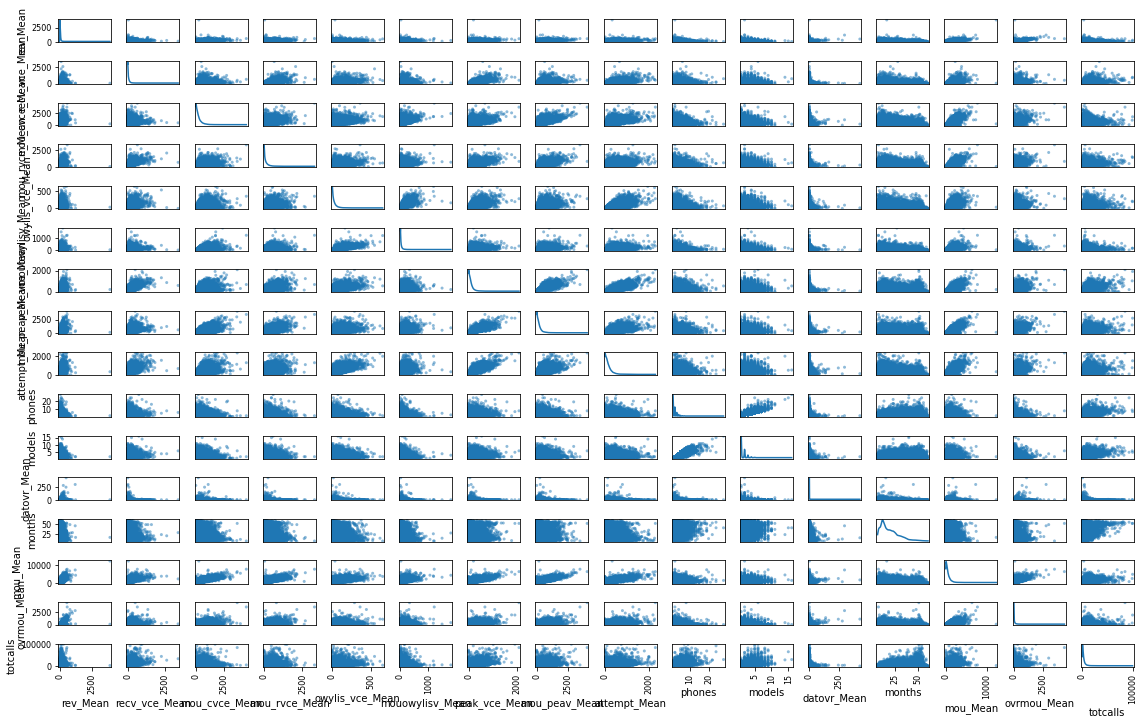

In [415]:
pd.plotting.scatter_matrix(df_filtered, figsize=(16, 10), diagonal='kde')
plt.tight_layout()
plt.show()

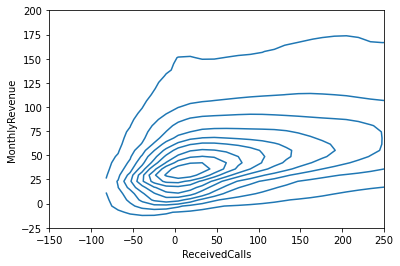

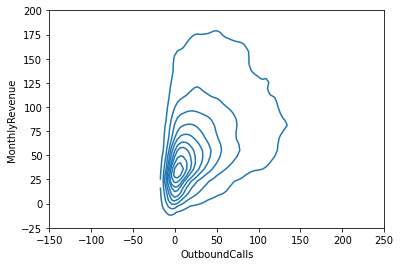

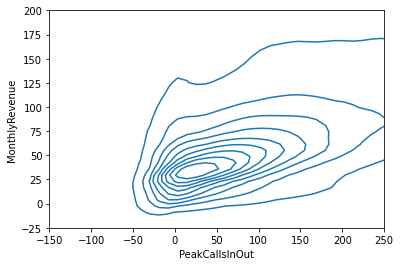

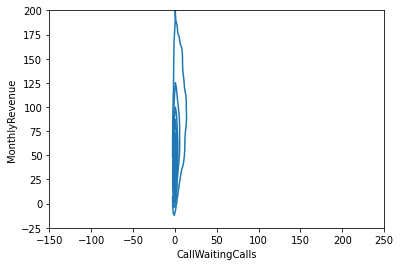

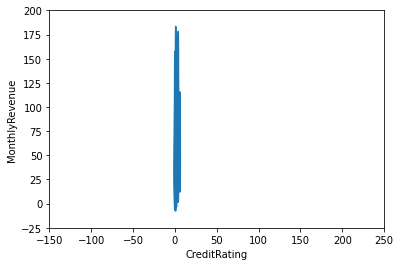

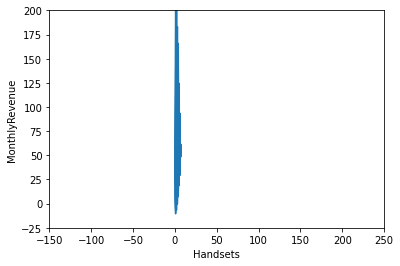

KeyboardInterrupt: 

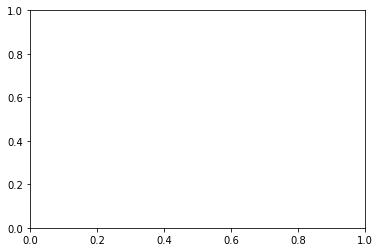

In [182]:
for target_feature in target_features:
    for predict_feature in predict_features:
        sns.kdeplot(data=df_filtered, x=predict_feature, y=target_feature)
        ax = plt.gca()
        ax.set_xlim([-150, 250])
        ax.set_ylim([-25, 250])
        plt.show()

In [416]:
for target_feature in target_features:
    for cat_column in cat_columns:
        if cat_column not in df_filtered.columns:
            continue
        print(cat_column)
        for cat_column_value in np.unique(df[cat_column]):
            data = df_filtered[df_filtered[cat_column] == cat_column_value][target_feature]
            print(cat_column_value, "Mean =", data.mean(), "Var =", data.var())
            sns.kdeplot(data, label=credit_rating)
        ax = plt.gca()
        ax.set_xlim([-50, 300])
        plt.title = cat_columns
        plt.legend()
        plt.show()

## Step 4. Estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [417]:
df_filtered.corr()

,rev_Mean,recv_vce_Mean,mou_cvce_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,peak_vce_Mean,mou_peav_Mean,attempt_Mean,phones,models,datovr_Mean,months,mou_Mean,ovrmou_Mean,totcalls
rev_Mean,1.000000,0.487699,0.563558,0.580334,0.479531,0.437057,0.619022,0.676474,0.581761,0.228117,0.225320,0.152664,-0.010473,0.706029,0.772117,0.402489
recv_vce_Mean,0.487699,1.000000,0.506734,0.788746,0.660266,0.511424,0.810383,0.633683,0.758803,0.309634,0.302268,0.033816,-0.015984,0.696093,0.417059,0.584186
mou_cvce_Mean,0.563558,0.506734,1.000000,0.675825,0.617749,0.632168,0.672269,0.803652,0.777136,0.213370,0.210656,0.048651,-0.072033,0.862251,0.474378,0.387349
mou_rvce_Mean,0.580334,0.788746,0.675825,1.000000,0.657076,0.611661,0.746327,0.784333,0.716421,0.270977,0.267159,0.041260,-0.034940,0.825693,0.514544,0.503992
owylis_vce_Mean,0.479531,0.660266,0.617749,0.657076,1.000000,0.846311,0.716458,0.629373,0.784994,0.260119,0.263388,0.048647,-0.037254,0.694616,0.403579,0.481154
mouowylisv_Mean,0.437057,0.511424,0.632168,0.611661,0.846311,1.000000,0.563284,0.593537,0.629372,0.203203,0.204526,0.044406,-0.041748,0.651059,0.377784,0.367089
peak_vce_Mean,0.619022,0.810383,0.672269,0.746327,0.716458,0.563284,1.000000,0.875517,0.885328,0.334036,0.327559,0.035206,0.031808,0.767809,0.515293,0.647038
mou_peav_Mean,0.676474,0.633683,0.803652,0.784333,0.629373,0.593537,0.875517,1.000000,0.769141,0.283473,0.279586,0.038055,0.030650,0.811250,0.571764,0.538766
attempt_Mean,0.581761,0.758803,0.777136,0.716421,0.784994,0.629372,0.885328,0.769141,1.000000,0.301256,0.296110,0.074338,-0.058387,0.824029,0.483668,0.554466
phones,0.228117,0.309634,0.213370,0.270977,0.260119,0.203203,0.334036,0.283473,0.301256,1.000000,0.890311,0.025892,0.369793,0.291907,0.141164,0.546115


<AxesSubplot:>

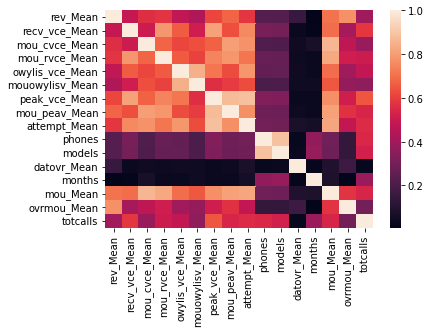

In [418]:
sns.heatmap(np.abs(df_filtered.corr()))

In [421]:
df_filtered = df_filtered.dropna()

In [422]:
from scipy.stats import pearsonr, norm

def pearsonr_ci(x, y, alpha=0.05):
    r, _ = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    z = norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, lo, hi

n = len(predict_features)
for i in range(n):
    for j in range(i + 1, n):
        cc, low, high = pearsonr_ci(df_filtered[predict_features[i]], df_filtered[predict_features[j]])
        print("CC [%f, %f] (%s, %s)" % (low, high, predict_features[i], predict_features[j]))

CC [0.500954, 0.510198] (recv_vce_Mean, mou_cvce_Mean)
CC [0.786082, 0.790781] (recv_vce_Mean, mou_rvce_Mean)
CC [0.655992, 0.663009] (recv_vce_Mean, owylis_vce_Mean)
CC [0.505800, 0.514983] (recv_vce_Mean, mouowylisv_Mean)
CC [0.807788, 0.812060] (recv_vce_Mean, peak_vce_Mean)
CC [0.629014, 0.636460] (recv_vce_Mean, mou_peav_Mean)
CC [0.755541, 0.760821] (recv_vce_Mean, attempt_Mean)
CC [0.304114, 0.315341] (recv_vce_Mean, phones)
CC [0.296561, 0.307845] (recv_vce_Mean, models)
CC [0.027613, 0.040017] (recv_vce_Mean, datovr_Mean)
CC [-0.021168, -0.008753] (recv_vce_Mean, months)
CC [0.692877, 0.699279] (recv_vce_Mean, mou_Mean)
CC [0.411915, 0.422174] (recv_vce_Mean, ovrmou_Mean)
CC [0.579780, 0.587965] (recv_vce_Mean, totcalls)
CC [0.671788, 0.678546] (mou_cvce_Mean, mou_rvce_Mean)
CC [0.612916, 0.620610] (mou_cvce_Mean, owylis_vce_Mean)
CC [0.627588, 0.635057] (mou_cvce_Mean, mouowylisv_Mean)
CC [0.667898, 0.674720] (mou_cvce_Mean, peak_vce_Mean)
CC [0.800869, 0.805278] (mou_cvce_Me

## Step 5. Task formulation for regression. Estimate multivariate correlation (target-predictors).

[Coefficient of multiple correlation](https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation)

<AxesSubplot:>

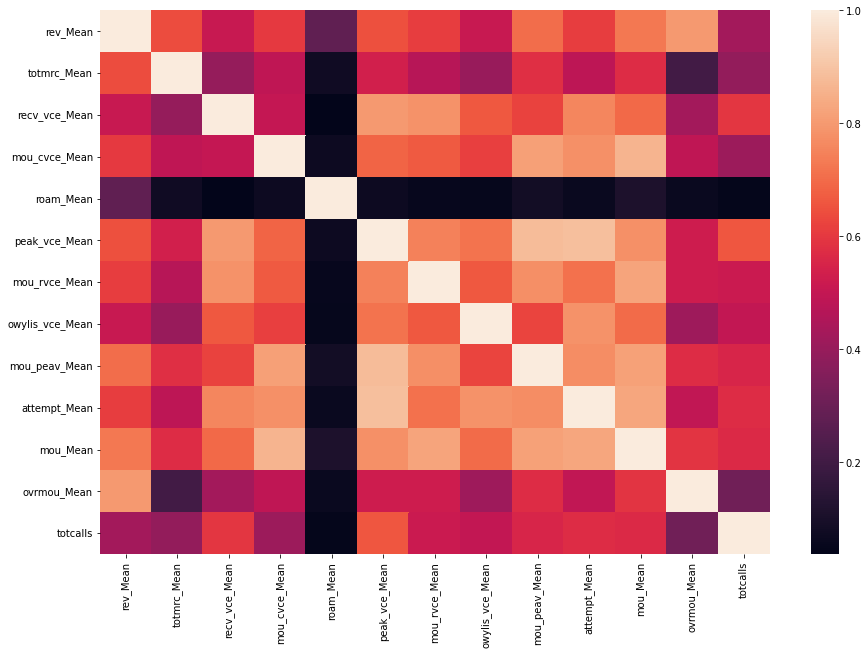

In [716]:
target_feature = 'rev_Mean'

predict_features = ['totmrc_Mean', 'recv_vce_Mean', 'mou_cvce_Mean', 'roam_Mean', 'peak_vce_Mean',
                    'mou_rvce_Mean', 'owylis_vce_Mean',
                    'mou_peav_Mean', 'attempt_Mean', 'mou_Mean', 'ovrmou_Mean', 'totcalls']

# predict_features = ['totmrc_Mean', 'ovrmou_Mean', 'totcalls', 'roam_Mean', 'phones', 'peak_vce_Mean']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[[target_feature] + predict_features].corr()))

In [717]:
X, y = df[predict_features], df[target_feature]

In [718]:
cxx = X.corr().to_numpy()
cxy = np.array([pearsonr(X[feature], y)[0] for feature in predict_features])
np.dot(np.dot(cxy.T, np.linalg.inv(cxx)), cxy)

0.91739347162633

In [719]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

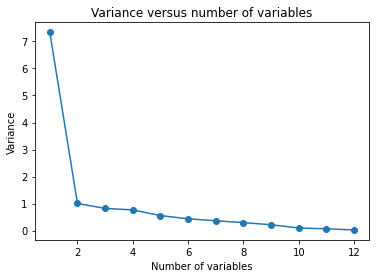

In [720]:
from sklearn.decomposition import PCA
    
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
#     print(y)
    x = np.arange(len(y)) + 1
    fig, ax = plt.subplots()
    ax.plot(x, y, "o-")
    ax.set_xlabel('Number of variables')
    ax.set_ylabel('Variance')
    ax.set_title('Variance versus number of variables')
    plt.show()
        
def get_features(pca, k=5):
    print([predict_features[i] for i in np.argsort(np.abs(pca.components_[k]))[-k:]])

pca = PCA().fit(X)
screeplot(pca, X)

## Step 6. Regression model and analysis of multicollinearity and regularization 

In [721]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [722]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [723]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.924974514303358
RMSE 11.62532678471167


We tried to use only one of 2 highly correlated features, but the reseult became worse.

In [724]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)
reg_ = LinearRegression().fit(X_train_, y_train_)
y_pred_ = reg_.predict(X_test_)
print("R2  ", r2_score(y_test, y_pred_))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_)))

R2   0.924974514303358
RMSE 11.62532678471167


In [725]:
from sklearn.linear_model import Lasso

reg_ = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred = reg_.predict(X_test)
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.9249650829182905
RMSE 11.62605746633847


          rev_Mean
count 15411.000000
mean      6.395456
std       9.709246
min       0.000006
25%       1.790099
50%       4.293205
75%       7.522517
max     394.937495


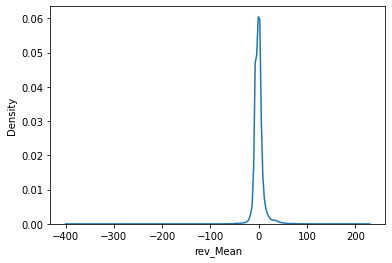

In [726]:
ax = plt.gca()
y_diff = y_test - y_pred
print(pd.DataFrame(np.abs(y_diff)).describe())
sns.kdeplot(y_diff)
plt.show()

In [727]:
from scipy.stats import normaltest
print(normaltest(y_diff))

NormaltestResult(statistic=6621.206692096216, pvalue=0.0)
